<a href="https://colab.research.google.com/github/El-Shorbagy01/CNNs-cats-VS-dogs-/blob/main/Copy_of_Mohamed_Essam_ElShorbagy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os

#Load the cats VS dogs Dataset

In [ ]:
#Run the cells of this section to get the data in (x_train,y_train), (x_test,y_test)

In [ ]:
!gdown 1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
!gdown 1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
!gdown 1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
!gdown 1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN

!unzip /content/cats_test.zip
!unzip /content/cats_train.zip
!unzip /content/dogs_test.zip
!unzip /content/dogs_train.zip

Downloading...
From: https://drive.google.com/uc?id=1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
To: /content/cats_test.zip
100% 10.2M/10.2M [00:00<00:00, 21.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
To: /content/cats_train.zip
100% 21.1M/21.1M [00:00<00:00, 36.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
To: /content/dogs_test.zip
100% 11.8M/11.8M [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN
To: /content/dogs_train.zip
100% 24.5M/24.5M [00:00<00:00, 25.9MB/s]
Archive:  /content/cats_test.zip
   creating: cats_and_dogs_small/test/cats/
  inflating: cats_and_dogs_small/test/cats/cat.1699.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1502.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1984.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1612.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1658.jpg  
  inflating: ca

In [ ]:
cats_train_path = "/content/cats_and_dogs_small/train/cats"
cats_test_path = "/content/cats_and_dogs_small/test/cats"
dogs_train_path = "/content/cats_and_dogs_small/train/dogs"
dogs_test_path = "/content/cats_and_dogs_small/test/dogs"
train_dir = "/content/cats_and_dogs_small/train/"
testing_dir = "/content/cats_and_dogs_small/test/"

cats_train_images = [f for f in os.listdir(cats_train_path)]
cats_test_images = [f for f in os.listdir(cats_test_path)]
dogs_train_images = [f for f in os.listdir(dogs_train_path)]
dogs_test_images = [f for f in os.listdir(dogs_test_path)]

print(len(cats_train_images))
print(len(cats_test_images))
print(len(dogs_train_images))
print(len(dogs_test_images))

1000
500
1000
500


In [ ]:
cats_train = np.ndarray((len(cats_train_images),150,150,3), dtype= np.int32)
cats_test = np.ndarray((len(cats_test_images),150,150,3), dtype= np.int32)
dogs_train = np.ndarray((len(dogs_train_images),150,150,3), dtype= np.int32)
dogs_test = np.ndarray((len(dogs_test_images),150,150,3), dtype= np.int32)

for i,img_name in enumerate(cats_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/cats/" + img_name).resize((150,150))
  cats_train[i] = np.asarray(img)

for i,img_name in enumerate(cats_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/cats/" + img_name).resize((150,150))
  cats_test[i] = np.asarray(img)

for i,img_name in enumerate(dogs_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/dogs/" + img_name).resize((150,150))
  dogs_train[i] = np.asarray(img)

for i,img_name in enumerate(dogs_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/dogs/" + img_name).resize((150,150))
  dogs_test[i] = np.asarray(img)

In [ ]:
training_images = np.concatenate((cats_train,dogs_train), axis=0)
testing_images = np.concatenate((cats_test,dogs_test), axis=0)

training_labels = np.concatenate((np.ones(len(cats_train),dtype= np.int32), \
                                  np.zeros(len(dogs_train),dtype= np.int32)))
testing_labels = np.concatenate((np.ones(len(cats_test),dtype= np.int32), \
                                 np.zeros(len(dogs_test),dtype= np.int32)))

print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(testing_labels.shape)

(2000, 150, 150, 3)
(1000, 150, 150, 3)
(2000,)
(1000,)


In [ ]:
training_shuffler = np.random.permutation(len(training_images))
x_train = training_images[training_shuffler]
y_train = training_labels[training_shuffler].reshape(2000,-1)

testing_shuffler = np.random.permutation(len(testing_images))
x_test = testing_images[testing_shuffler]
y_test = testing_labels[testing_shuffler].reshape(1000,-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


#Exploratory Data Analysis



In [ ]:
#Take a minute to explore the data
#show 10 images from each class

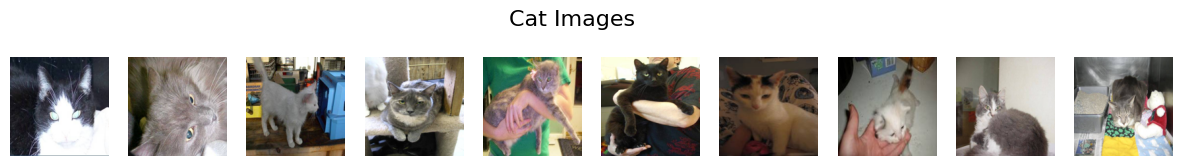

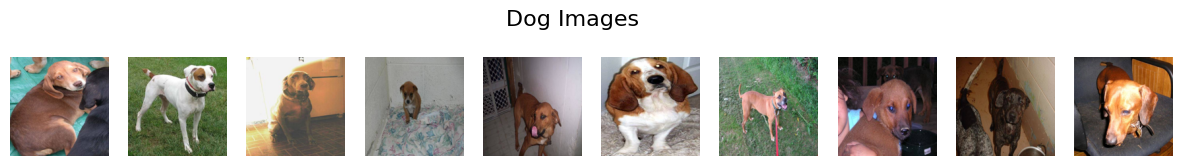

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to plot images
def plot_images(images, labels, class_name, num_images=10):
    plt.figure(figsize=(15, 2))
    plt.suptitle(class_name, fontsize=16)

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

# Display 10 random cat images
random_cats_indices = random.sample(range(len(cats_train_images)), 10)
random_cats_images = [cats_train[i] for i in random_cats_indices]
plot_images(random_cats_images, ['Cat'] * 10, 'Cat Images')

# Display 10 random dog images
random_dogs_indices = random.sample(range(len(dogs_train_images)), 10)
random_dogs_images = [dogs_train[i] for i in random_dogs_indices]
plot_images(random_dogs_images, ['Dog'] * 10, 'Dog Images')


#Data preproceesing

In [ ]:
#Normalize images pixels values in range [0,1]

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.

#Classify the data using Dense Layers

In [ ]:
#Build a FCNN model to classify the data into cats and dogs
#You may use the same Architecture we used for CIFAR10 or any other Architecture
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (55% --> 60%)
#Hint: look for 'early stopping' and use it

Epoch 1/30
63/63 [==============================] - 9s 37ms/step - loss: 10.7160 - accuracy: 0.4880 - val_loss: 0.7039 - val_accuracy: 0.5180
Epoch 2/30
63/63 [==============================] - 1s 20ms/step - loss: 0.7092 - accuracy: 0.5035 - val_loss: 0.6929 - val_accuracy: 0.5050
Epoch 3/30
63/63 [==============================] - 1s 23ms/step - loss: 0.7027 - accuracy: 0.4915 - val_loss: 0.6909 - val_accuracy: 0.5170
Epoch 4/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6938 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 5/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6929 - accuracy: 0.5005 - val_loss: 0.6929 - val_accuracy: 0.5040
Epoch 6/30
63/63 [==============================] - 1s 22ms/step - loss: 0.7074 - accuracy: 0.5015 - val_loss: 0.6929 - val_accuracy: 0.5060


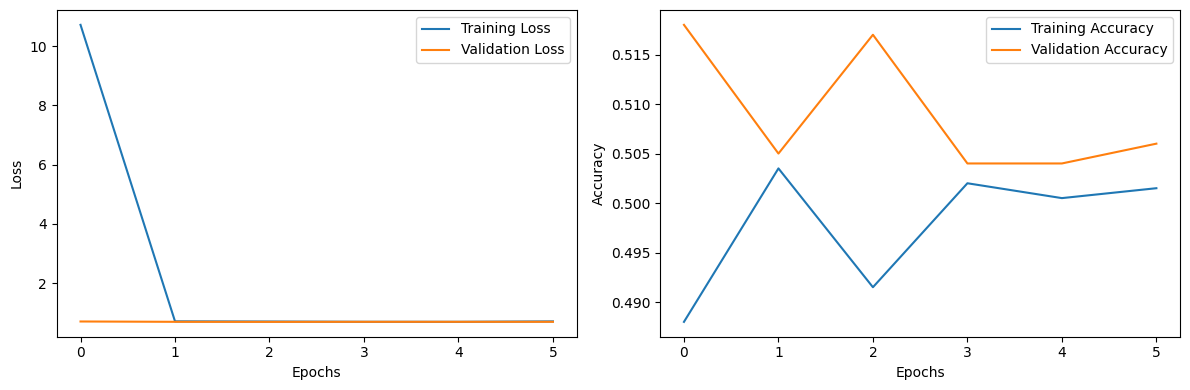

In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks

# Build a Fully Connected Neural Network (FCNN) model
model_fcnn = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_fcnn.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_fcnn = model_fcnn.fit(x_train_normalized, y_train, epochs=30,
                              validation_data=(x_test_normalized, y_test),
                              callbacks=[early_stopping])

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_fcnn.history['loss'], label='Training Loss')
plt.plot(history_fcnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fcnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_fcnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Classify the data using ConvNets

In [ ]:
#Build a CNN model to classify the data into cats and dogs
#The model Architecture is as follows:
  #1. conv layer with 32 filters of size (3,3) and relu activation
  #2. max pooling layer with filter size (2,2), stride= 2
  #3. conv layer with 64 filters of size (3,3) and relu activation
  #4. max pooling layer with filter size (2,2), stride= 2
  #5. conv layer with 128 filters of size (3,3) and relu activation
  #6. max pooling layer with filter size (2,2), stride= 2
  #7. conv layer with 128 filters of size (3,3) and relu activation
  #8. max pooling layer with filter size (2,2), stride= 2
  #9. Dense Layer with 512 neurons and relu activation
  #10.Output layer
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (65% -- 70%)

Epoch 1/30
63/63 [==============================] - 11s 62ms/step - loss: 0.7230 - accuracy: 0.5110 - val_loss: 0.6921 - val_accuracy: 0.5860
Epoch 2/30
63/63 [==============================] - 2s 31ms/step - loss: 0.6914 - accuracy: 0.5295 - val_loss: 0.6925 - val_accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 2s 33ms/step - loss: 0.6879 - accuracy: 0.5350 - val_loss: 0.6842 - val_accuracy: 0.5700
Epoch 4/30
63/63 [==============================] - 2s 39ms/step - loss: 0.6763 - accuracy: 0.5820 - val_loss: 0.7132 - val_accuracy: 0.5320
Epoch 5/30
63/63 [==============================] - 2s 36ms/step - loss: 0.6555 - accuracy: 0.6155 - val_loss: 0.8001 - val_accuracy: 0.5850
Epoch 6/30
63/63 [==============================] - 2s 31ms/step - loss: 0.6356 - accuracy: 0.6480 - val_loss: 0.6629 - val_accuracy: 0.6110
Epoch 7/30
63/63 [==============================] - 2s 36ms/step - loss: 0.6130 - accuracy: 0.6685 - val_loss: 0.6626 - val_accuracy: 0.6110
Epoch 8/30
6

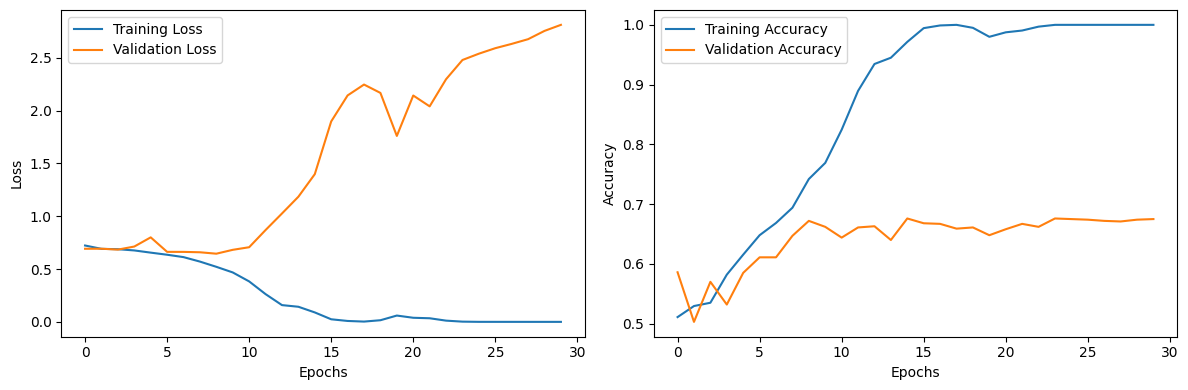

In [ ]:
from tensorflow.keras import layers, models, optimizers

# Build a Convolutional Neural Network (CNN) model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(x_train_normalized, y_train, epochs=30,
                            validation_data=(x_test_normalized, y_test))

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Data Augmentation with Transfer Learning

In [ ]:
#Perform a brief search and try to understand what Data Augmentation means first.
#use Data Augmentation to enhance the Transfer Learning model performance
#Hint: search for ImageDataGenerator
#you should get validation accuracy of about (95% --> 97%)

<ipython-input-17-7a38bf2d88db>:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_transfer_learning = model_transfer_learning.fit_generator(


Epoch 1/30
100/100 [==============================] - 20s 172ms/step - loss: 0.9966 - accuracy: 0.6600 - val_loss: 0.3606 - val_accuracy: 0.8320
Epoch 2/30
100/100 [==============================] - 17s 171ms/step - loss: 0.5127 - accuracy: 0.7580 - val_loss: 0.3597 - val_accuracy: 0.8300
Epoch 3/30
100/100 [==============================] - 19s 188ms/step - loss: 0.4701 - accuracy: 0.7815 - val_loss: 0.2886 - val_accuracy: 0.8700
Epoch 4/30
100/100 [==============================] - 17s 169ms/step - loss: 0.4215 - accuracy: 0.8105 - val_loss: 0.2698 - val_accuracy: 0.8830
Epoch 5/30
100/100 [==============================] - 19s 195ms/step - loss: 0.4245 - accuracy: 0.7955 - val_loss: 0.2821 - val_accuracy: 0.8820
Epoch 6/30
100/100 [==============================] - 18s 178ms/step - loss: 0.4171 - accuracy: 0.8135 - val_loss: 0.2643 - val_accuracy: 0.8890
Epoch 7/30
100/100 [==============================] - 17s 170ms/step - loss: 0.3891 - accuracy: 0.8280 - val_loss: 0.2598 - val_ac

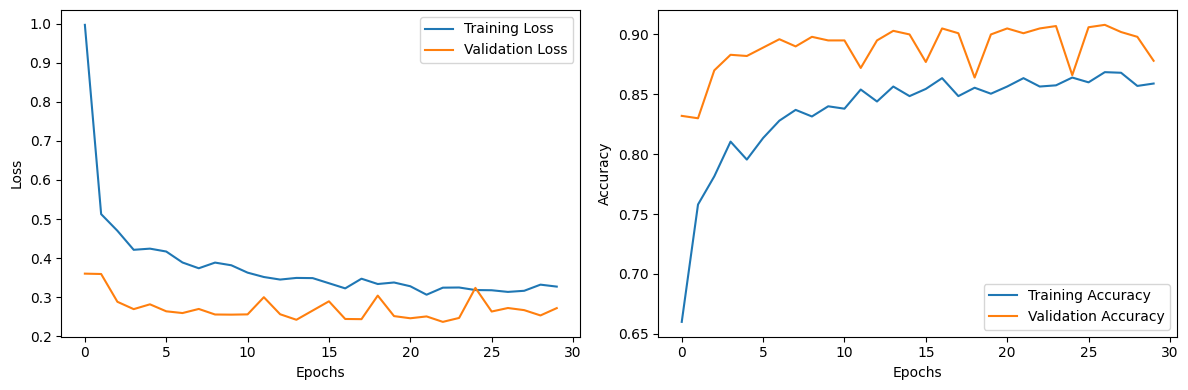

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training dataset
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should not be augmented
validation_datagen_augmented = ImageDataGenerator(rescale=1./255)

# Create data generators with augmentation
train_generator_augmented = train_datagen_augmented.flow(x_train, y_train, batch_size=20)
validation_generator_augmented = validation_datagen_augmented.flow(x_test, y_test, batch_size=20)

# Build and compile the model (VGG16 transfer learning)
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet data
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Create a new model using the VGG16 base and adding dense layers on top
model_transfer_learning = models.Sequential([
    base_model_vgg16,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_transfer_learning.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

# Train the model with data augmentation
history_transfer_learning = model_transfer_learning.fit_generator(
    train_generator_augmented,
    steps_per_epoch=len(x_train) // 20,
    epochs=30,
    validation_data=validation_generator_augmented,
    validation_steps=len(x_test) // 20
)

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_transfer_learning.history['loss'], label='Training Loss')
plt.plot(history_transfer_learning.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer_learning.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Transfer Learning (VGG16)

In [ ]:
#Build a model with the help of a pretrained network (VGG16)
#Hint: search for "how to use VGG16 for Transfer Learning in Keras"
#The model Architecture is as follows:
  #1. the conv base of VGG16 (non trainable)
  #2. Dense Layer with 256 neurons and relu activation
  #3. Output layer
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (85% -- 90%)

58889256/58889256 [==============================] - 3s 0us/step


Epoch 1/30
63/63 [==============================] - 15s 146ms/step - loss: 0.8382 - accuracy: 0.7390 - val_loss: 0.3031 - val_accuracy: 0.8690
Epoch 2/30
63/63 [==============================] - 6s 97ms/step - loss: 0.3002 - accuracy: 0.8695 - val_loss: 0.4313 - val_accuracy: 0.8090
Epoch 3/30
63/63 [==============================] - 7s 107ms/step - loss: 0.2378 - accuracy: 0.9010 - val_loss: 0.3247 - val_accuracy: 0.8550
Epoch 4/30
63/63 [==============================] - 7s 108ms/step - loss: 0.2075 - accuracy: 0.9130 - val_loss: 0.2899 - val_accuracy: 0.8820
Epoch 5/30
63/63 [==============================] - 7s 108ms/step - loss: 0.1575 - accuracy: 0.9345 - val_loss: 0.3344 - val_accuracy: 0.8620
Epoch 6/30
63/63 [==============================] - 7s 109ms/step - loss: 0.1524 - accuracy: 0.9400 - val_loss: 0.2804 - val_accuracy: 0.8790
Epoch 7/30
63/63 [==============================] - 6s 101ms/step - loss: 0.1063 - accuracy: 0.9630 - val_loss: 0.2670 - val_accuracy: 0.8950
Epoch 

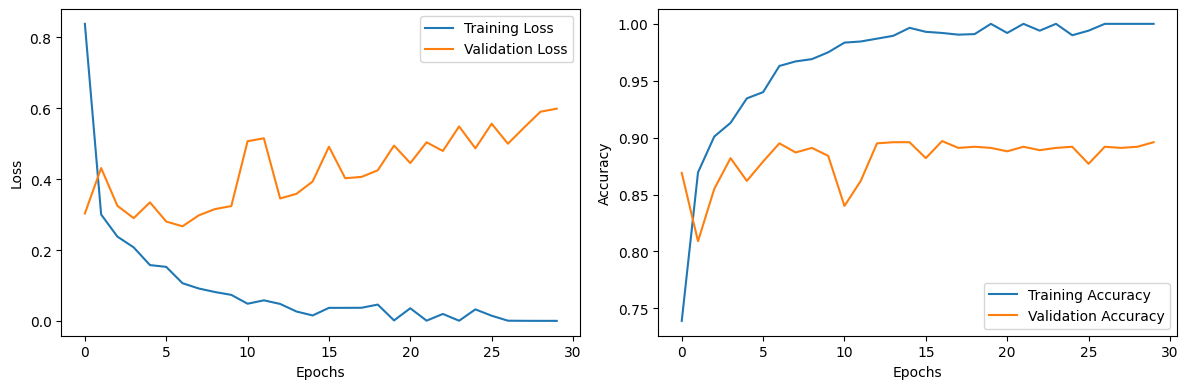

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Load the VGG16 model pre-trained on ImageNet data
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Create a new model using the VGG16 base and adding dense layers on top
model_transfer_learning_vgg16 = models.Sequential([
    base_model_vgg16,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_transfer_learning_vgg16.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                                      loss='binary_crossentropy',
                                      metrics=['accuracy'])

# Train the model
history_transfer_learning_vgg16 = model_transfer_learning_vgg16.fit(x_train_normalized, y_train, epochs=30,
                                                                    validation_data=(x_test_normalized, y_test))

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_transfer_learning_vgg16.history['loss'], label='Training Loss')
plt.plot(history_transfer_learning_vgg16.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer_learning_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
